# Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from PIL import Image

import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import plot_model

import warnings
# Ignore warnings
warnings.filterwarnings("ignore")

In [2]:
# Mount your Google Drive.
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/ISL_sign_Language.zip

Streaming output truncated to the last 5000 lines.
  inflating: Indian/V/819.jpg        
  inflating: Indian/V/82.jpg         
  inflating: Indian/V/820.jpg        
  inflating: Indian/V/821.jpg        
  inflating: Indian/V/822.jpg        
  inflating: Indian/V/823.jpg        
  inflating: Indian/V/824.jpg        
  inflating: Indian/V/825.jpg        
  inflating: Indian/V/826.jpg        
  inflating: Indian/V/827.jpg        
  inflating: Indian/V/828.jpg        
  inflating: Indian/V/829.jpg        
  inflating: Indian/V/83.jpg         
  inflating: Indian/V/830.jpg        
  inflating: Indian/V/831.jpg        
  inflating: Indian/V/832.jpg        
  inflating: Indian/V/833.jpg        
  inflating: Indian/V/834.jpg        
  inflating: Indian/V/835.jpg        
  inflating: Indian/V/836.jpg        
  inflating: Indian/V/837.jpg        
  inflating: Indian/V/838.jpg        
  inflating: Indian/V/839.jpg        
  inflating: Indian/V/84.jpg         
  inflating: Indian/V/840.jpg        

# ISL (Indian Sign Language)

# Loading Datast

In [4]:
# Define the root directory path
root_dir = "/content/Indian"

# Maximum number of images to load from each subdir_path
max_images_per_subdir = 500

# Initialize a list to store the image data
image_data = []

# Iterate through the subdirectories in the root directory
for label in os.listdir(root_dir):
    # Check if the subdirectory is numeric
    if not label.isdigit():
        # Get the path to the subdirectory
        subdir_path = os.path.join(root_dir, label)

        # Use list comprehension to load a maximum images
        images = [
            {'label': label, 'color_image': Image.open(os.path.join(subdir_path, file))}
            for i, file in enumerate(os.listdir(subdir_path))
            if i < max_images_per_subdir
        ]

        # Extend the image_data list with the loaded images
        image_data.extend(images)

        # Check if the maximum number of images has been reached
        if len(images) == max_images_per_subdir:
            continue

# Create a DataFrame from the image data
df = pd.DataFrame(image_data)

In [5]:
df

,label,color_image
0,R,<PIL.JpegImagePlugin.JpegImageFile image mode=...
1,R,<PIL.JpegImagePlugin.JpegImageFile image mode=...
2,R,<PIL.JpegImagePlugin.JpegImageFile image mode=...
3,R,<PIL.JpegImagePlugin.JpegImageFile image mode=...
4,R,<PIL.JpegImagePlugin.JpegImageFile image mode=...
...,...,...
12995,U,<PIL.JpegImagePlugin.JpegImageFile image mode=...
12996,U,<PIL.JpegImagePlugin.JpegImageFile image mode=...
12997,U,<PIL.JpegImagePlugin.JpegImageFile image mode=...
12998,U,<PIL.JpegImagePlugin.JpegImageFile image mode=...


In [6]:
df['label'].unique()

array(['R', 'S', 'B', 'H', 'G', 'M', 'X', 'I', 'J', 'L', 'A', 'K', 'O',
       'P', 'N', 'E', 'F', 'W', 'Q', 'V', 'Y', 'D', 'C', 'Z', 'T', 'U'],
      dtype=object)

# Data Visualization (EDA)

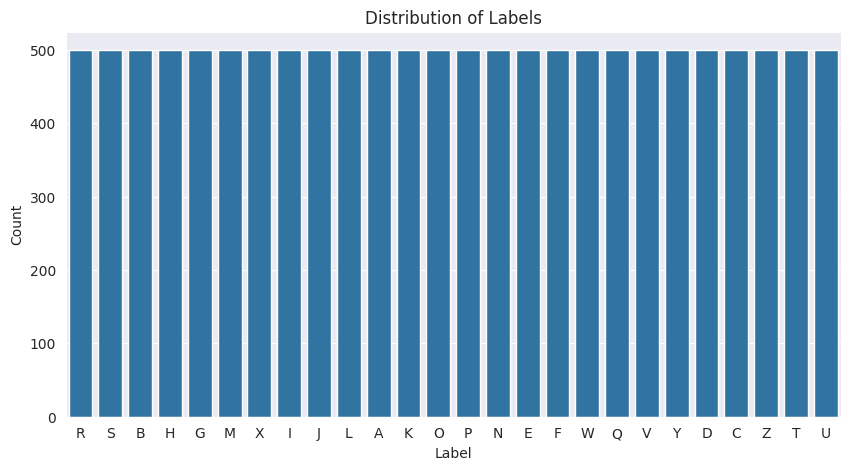

In [7]:
plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.countplot(data=df,x='label')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')

plt.show()

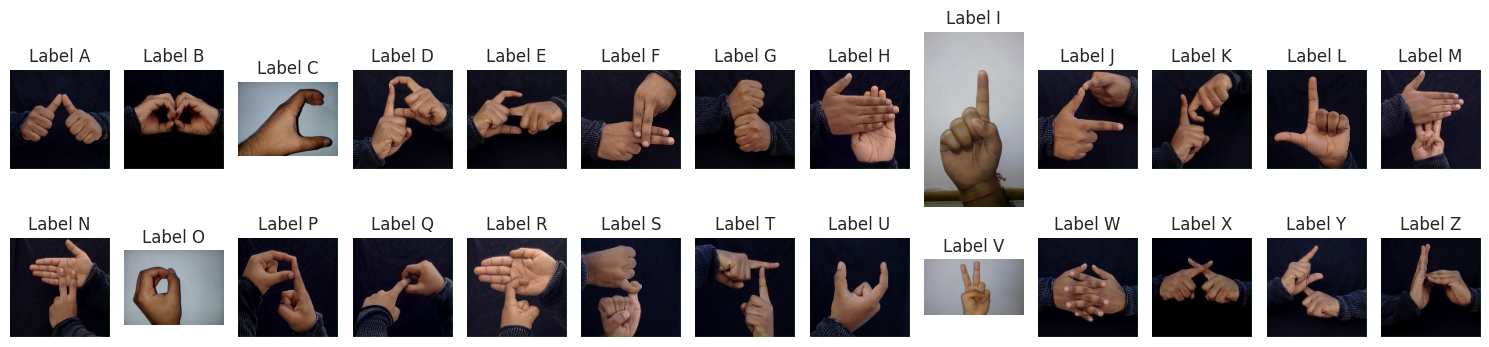

In [8]:
fig, axs = plt.subplots(2,13, figsize=(15, 4))

for i, (label, image) in enumerate(df.groupby('label').first().reset_index()[['label', 'color_image']].itertuples(index=False)):
    ax = axs[i // 13, i % 13]
    ax.imshow(image)
    ax.set_title('Label {}'.format(label))
    ax.axis('off')

plt.axis('off')
plt.tight_layout()
plt.show()

# Data Preprocessing

In [11]:
# Preprocessing steps
# images = np.array(df['color_image'].tolist())
# Preprocessing steps
images = df['color_image'].tolist()
# Resize images to a common size
images = [np.array(img.resize((32, 32))) for img in images]
images = np.array(images)  # Convert to NumPy array after resizing
labels = np.array(df['label'])

In [13]:
# Normalize pixel values
images = images / 255.0

In [14]:
# Map labels to numerical values
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Splitting the data into Training and Testing

In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [16]:
# Convert labels to categorical format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Model Architecture

In [17]:
model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))
model.add(Conv2D(50, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))
model.add(Conv2D(25, (3, 3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=26, activation='softmax'))

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 75)          │           2,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 75)          │             300 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 75)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 50)          │          33,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 50)          │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 50)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 25)            │          11,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 25)            │             100 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 25)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         205,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │          13,338 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,425 (1.02 MB)

 Trainable params: 266,125 (1.02 MB)

 Non-trainable params: 300 (1.17 KB)

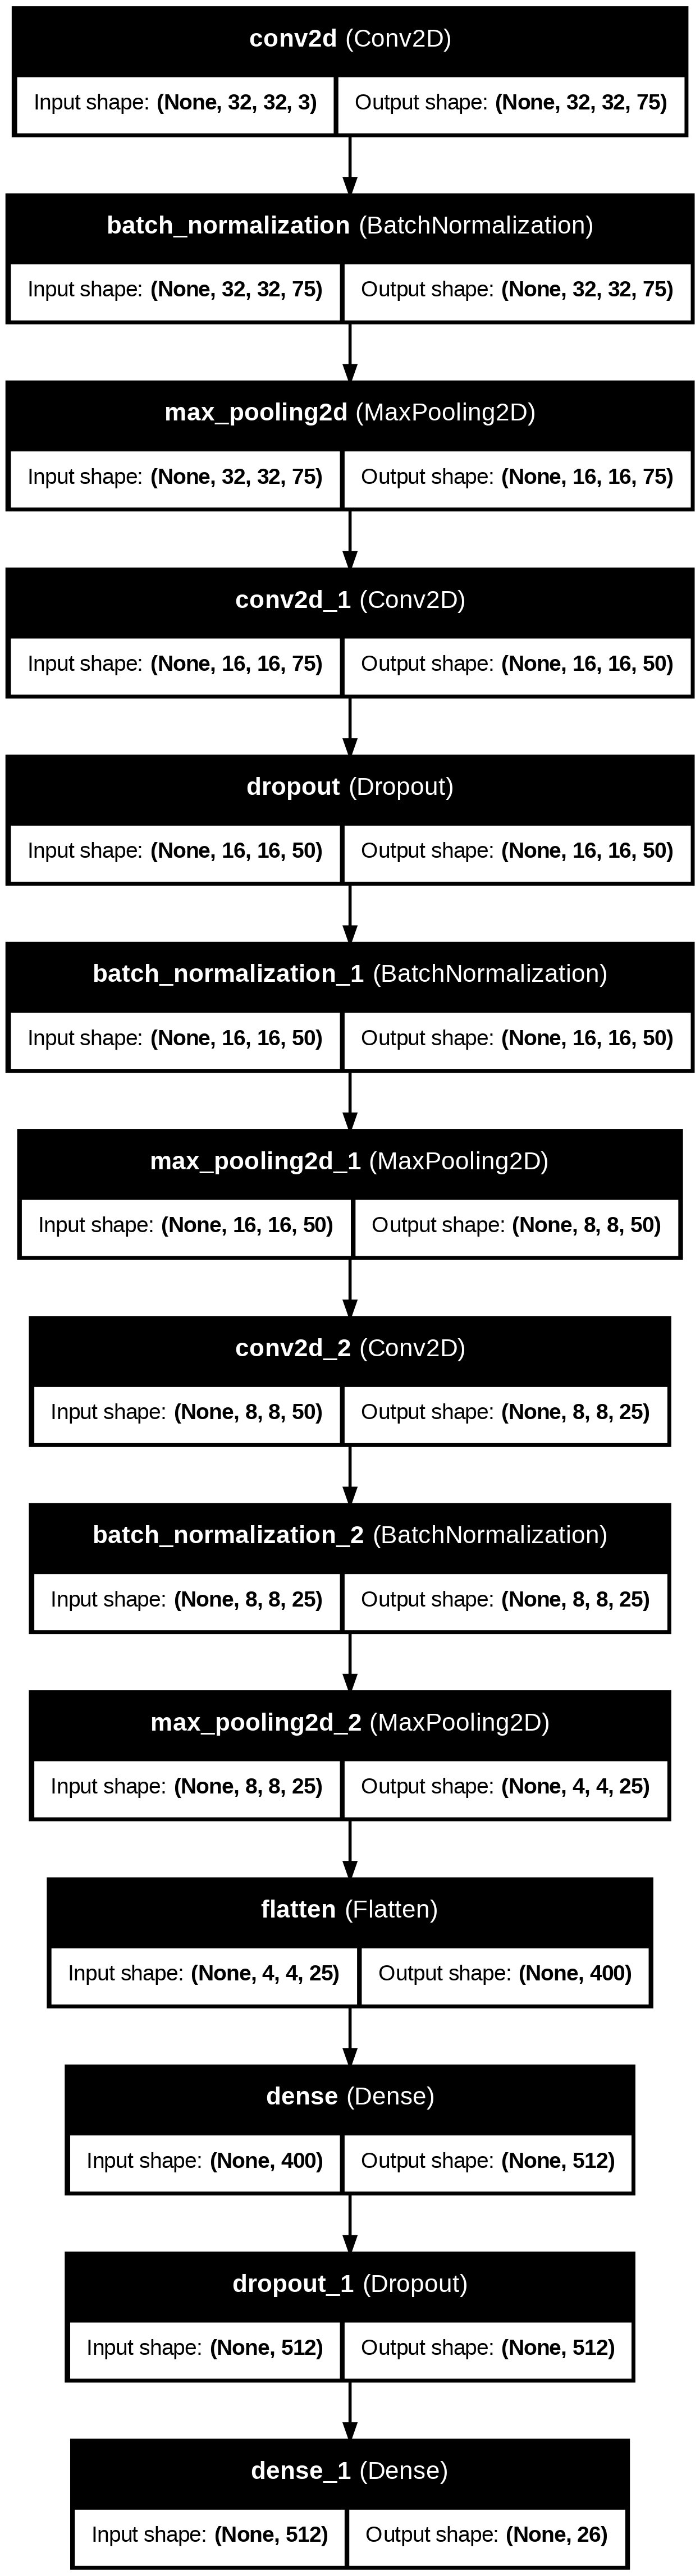

In [20]:
plot_model(model, to_file='/content/model_architecture2.png', show_shapes=True, show_layer_names=True)

# Data Augmentation

In [19]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

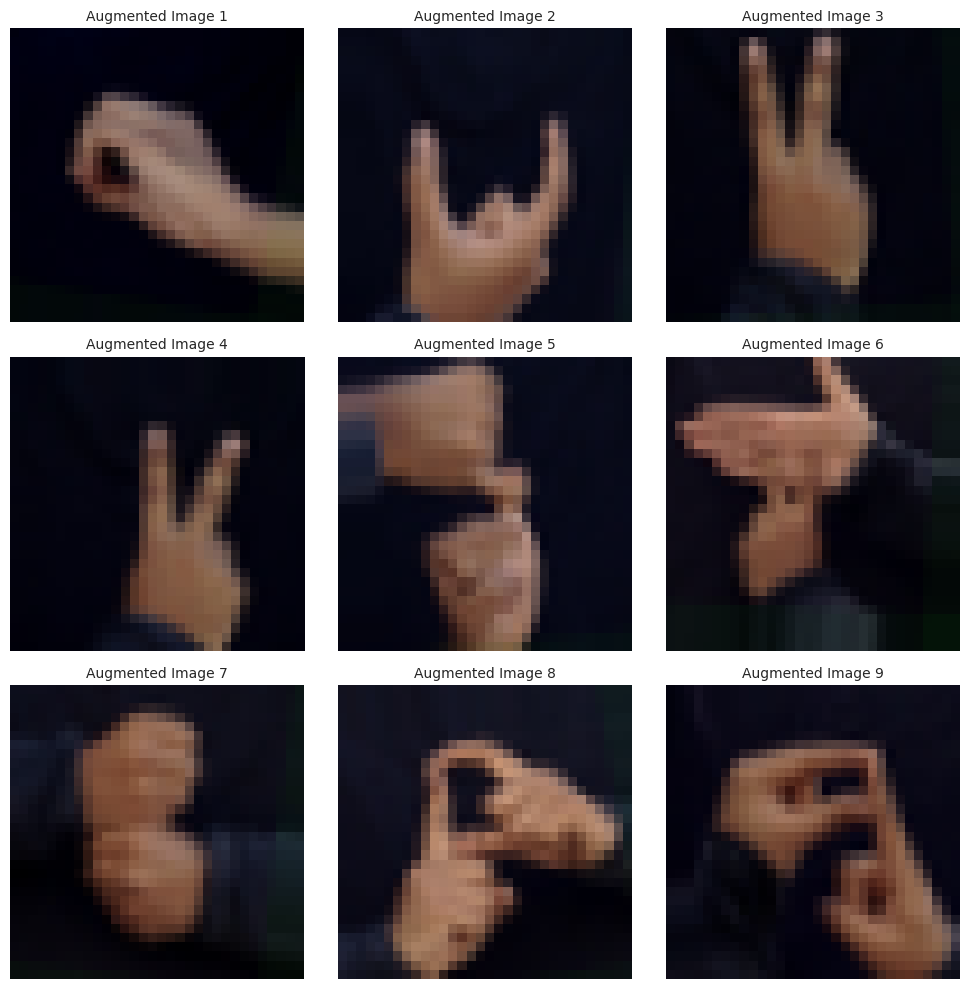

In [21]:
augmented_images = []
for X_batch, _ in datagen.flow(X_train, y_train, batch_size=9):  # Use underscore to ignore the labels
    for img in X_batch:
        augmented_images.append(img)
    break  # Generate only one batch of augmented images

# Display augmented images
plt.figure(figsize=(10, 10))
for i, image in enumerate(augmented_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image.squeeze(), cmap='gray')  # Squeeze to remove the channel dimension
    plt.title(f'Augmented Image {i + 1}', fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()

# Fitting the Model

In [22]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', patience=2, verbose=1, factor=0.5, min_lr=0.001)
history = model.fit(datagen.flow(X_train,y_train), epochs=25, validation_data=(X_test, y_test), callbacks=[learning_rate_reduction])

Epoch 1/25
325/325 ━━━━━━━━━━━━━━━━━━━━ 67s 197ms/step - accuracy: 0.6791 - loss: 1.2704 - val_accuracy: 0.6723 - val_loss: 2.0216 - learning_rate: 0.0100
Epoch 2/25
325/325 ━━━━━━━━━━━━━━━━━━━━ 78s 186ms/step - accuracy: 0.9888 - loss: 0.0704 - val_accuracy: 0.9996 - val_loss: 0.0234 - learning_rate: 0.0100
Epoch 3/25
325/325 ━━━━━━━━━━━━━━━━━━━━ 81s 183ms/step - accuracy: 0.9931 - loss: 0.0379 - val_accuracy: 0.9988 - val_loss: 0.0059 - learning_rate: 0.0100
Epoch 4/25
325/325 ━━━━━━━━━━━━━━━━━━━━ 61s 187ms/step - accuracy: 0.9949 - loss: 0.0246 - val_accuracy: 0.9992 - val_loss: 0.0036 - learning_rate: 0.0100
Epoch 5/25
325/325 ━━━━━━━━━━━━━━━━━━━━ 82s 189ms/step - accuracy: 0.9975 - loss: 0.0166 - val_accuracy: 0.9992 - val_loss: 0.0021 - learning_rate: 0.0100
Epoch 6/25
325/325 ━━━━━━━━━━━━━━━━━━━━ 64s 195ms/step - accuracy: 0.9984 - loss: 0.0118 - val_accuracy: 1.0000 - val_loss: 0.0011 - learning_rate: 0.0100
Epoch 7/25
325/325 ━━━━━━━━━━━━━━━━━━━━ 84s 202ms/step - accuracy: 0.9

# Model Evaluation

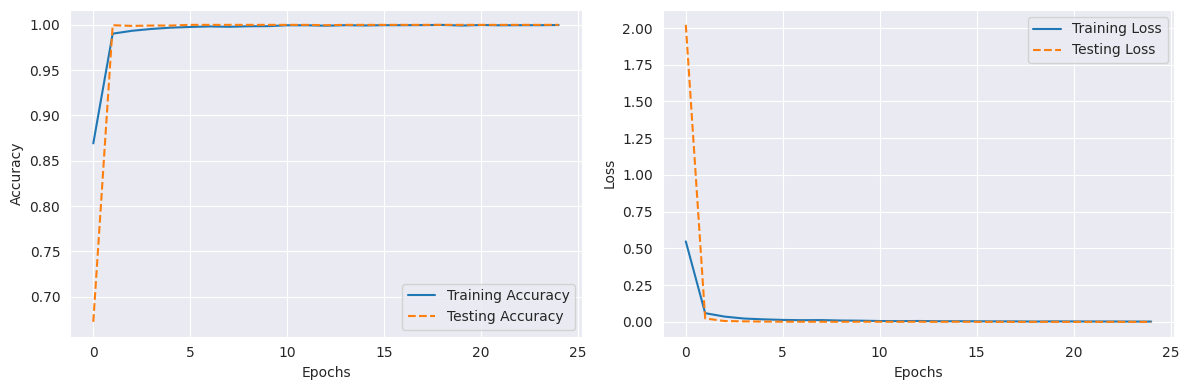

In [23]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Define plot labels and styles
plot_labels = ['Accuracy', 'Loss']
plot_styles = ['-', '--']

# Plot training and testing accuracy/loss
for i, metric in enumerate(['accuracy', 'loss']):
    train_metric = history.history[metric]
    test_metric = history.history['val_' + metric]
    axs[i].plot(train_metric, label='Training ' + metric.capitalize(), linestyle=plot_styles[0])
    axs[i].plot(test_metric, label='Testing ' + metric.capitalize(), linestyle=plot_styles[1])
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel(plot_labels[i])
    axs[i].legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [24]:
# Get the model's predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step


In [25]:
# Create the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

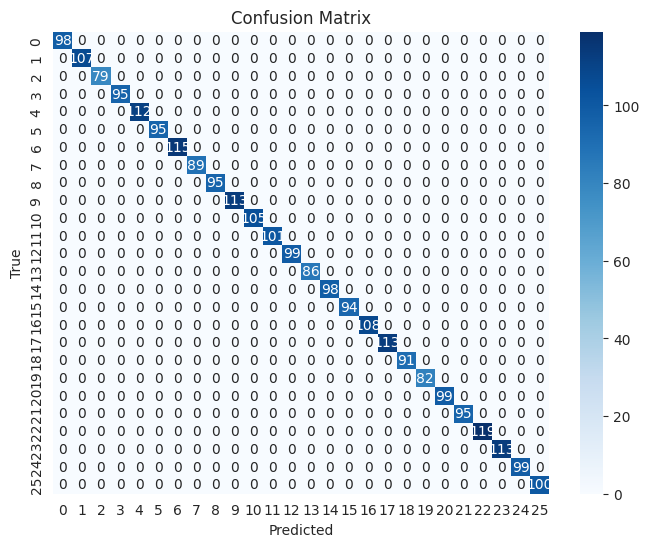

In [26]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [27]:
accuracy = model.evaluate(X_test, y_test)
print(f'validation test results - Loss: {accuracy[0]} - Accuracy: {accuracy[1]*100}%')

82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 1.0000 - loss: 1.4844e-04
validation test results - Loss: 0.0001506312401033938 - Accuracy: 100.0%


# Saving the Model

In [28]:
model.save("indianSignLanguage.h5")

# <center> -----------------------------  END   ---------------------------</center>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


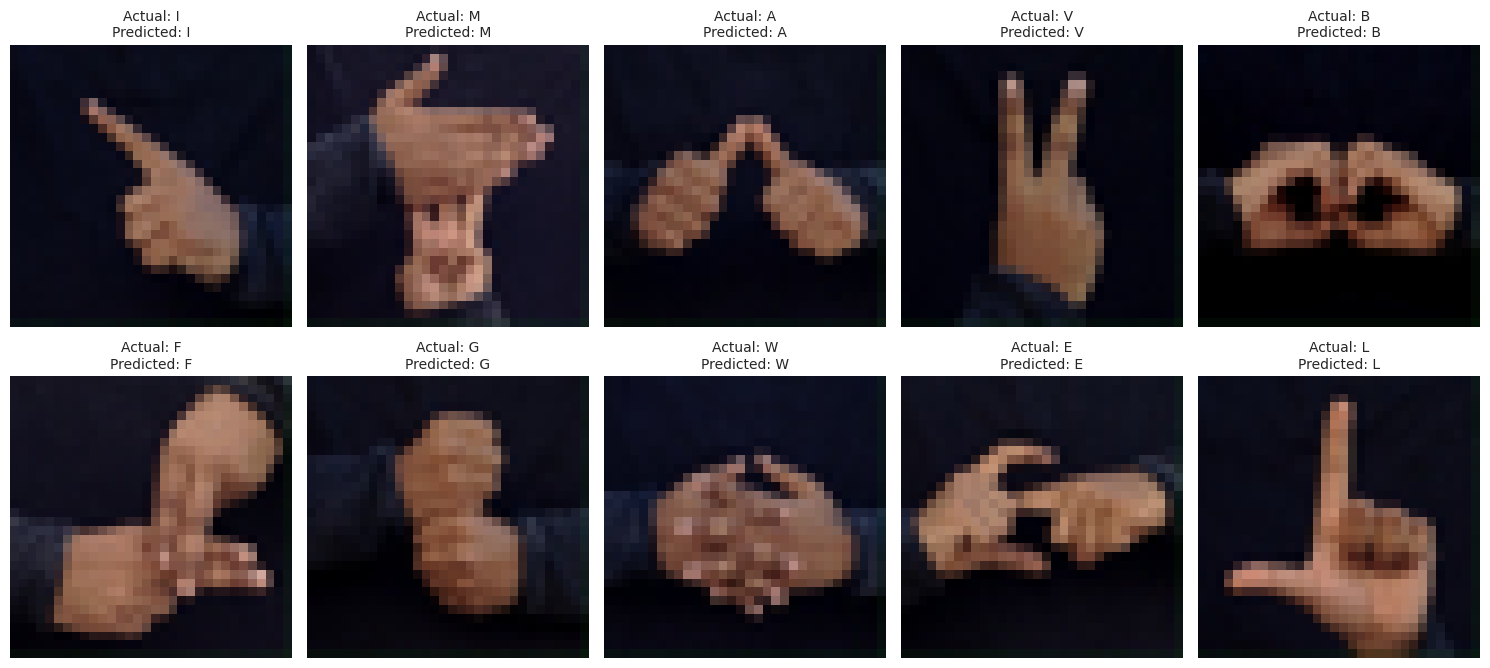

In [29]:
# Get model predictions for the first 10 images in the test set
predictions = model.predict(X_test[:10])
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = np.argmax(y_test[:10], axis=1)

# Decode labels using label encoder
predicted_labels = label_encoder.inverse_transform(predicted_labels)
actual_labels = label_encoder.inverse_transform(actual_labels)

# Display actual and predicted labels along with images for the first 10 images
plt.figure(figsize=(15, 7))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Actual: {actual_labels[i]}\nPredicted: {predicted_labels[i]}", fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()
